In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

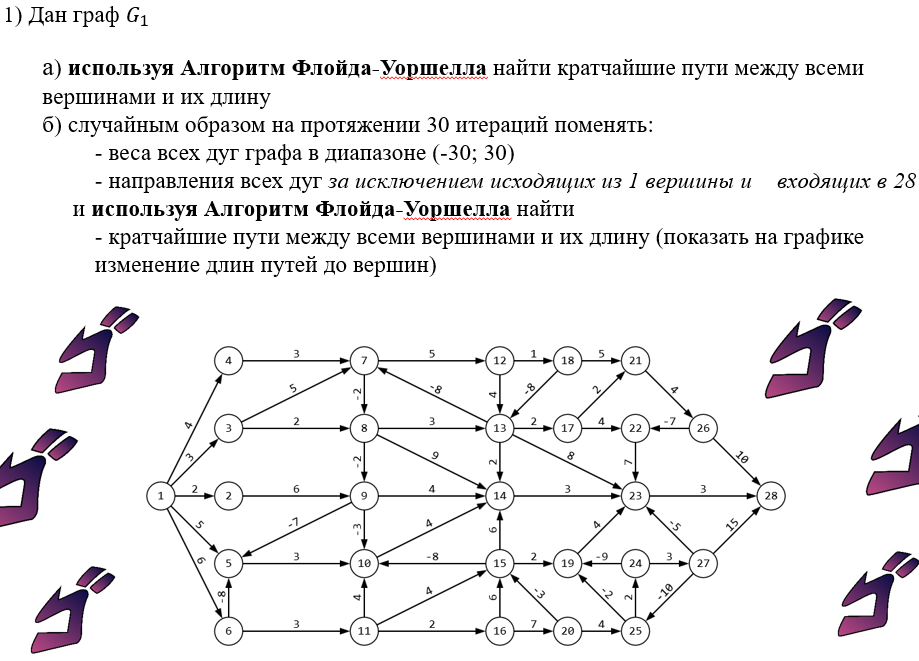

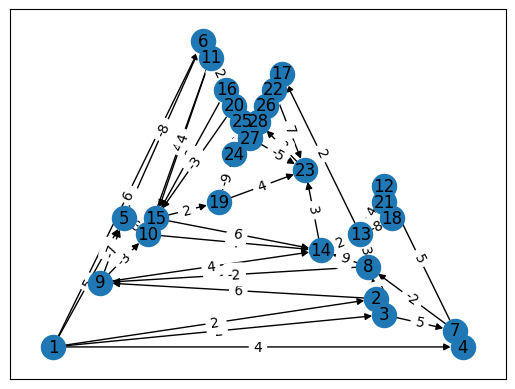

In [5]:
edges = [
 (1, 4, 4), (1, 3, 2), (1, 2, 2), (1, 5, 5), (1, 6, 6),
 (2, 9, 6), (3, 7, 5), (3, 8, 2), (4, 7, 3), (5, 10, 3),
 (6, 5, -8), (6, 11, 3), (7, 12, 5), (7, 8, -2), (8, 9, -2),
 (8, 13, 3), (8, 14, 9), (9, 10, -3), (9, 5, -7), (9, 14, 4),
 (10, 14, 4), (11, 10, 4), (11, 15, 4), (11, 16, 2), (12, 13, 4),
 (12, 18, 1), (13, 14, 2), (13, 17, 2), (14, 23, 3), (15, 14, 6),
 (15, 10, -8), (15, 19, 2), (16, 20, 7), (16, 15, 6), (17, 22, 4),
 (18, 13, -8), (18, 21, 5), (19, 23, 4), (20, 15, -3), (20, 25, 4),
 (22, 23, 7), (23, 28, 3), (24, 19, -9), (24, 27, 3), (25, 24, 2),
 (26, 22, -7), (26, 28, 10), (27, 23, -5), (27, 25, -10), (27, 28, 15)
]
G = nx.DiGraph()
G.add_weighted_edges_from(edges)
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

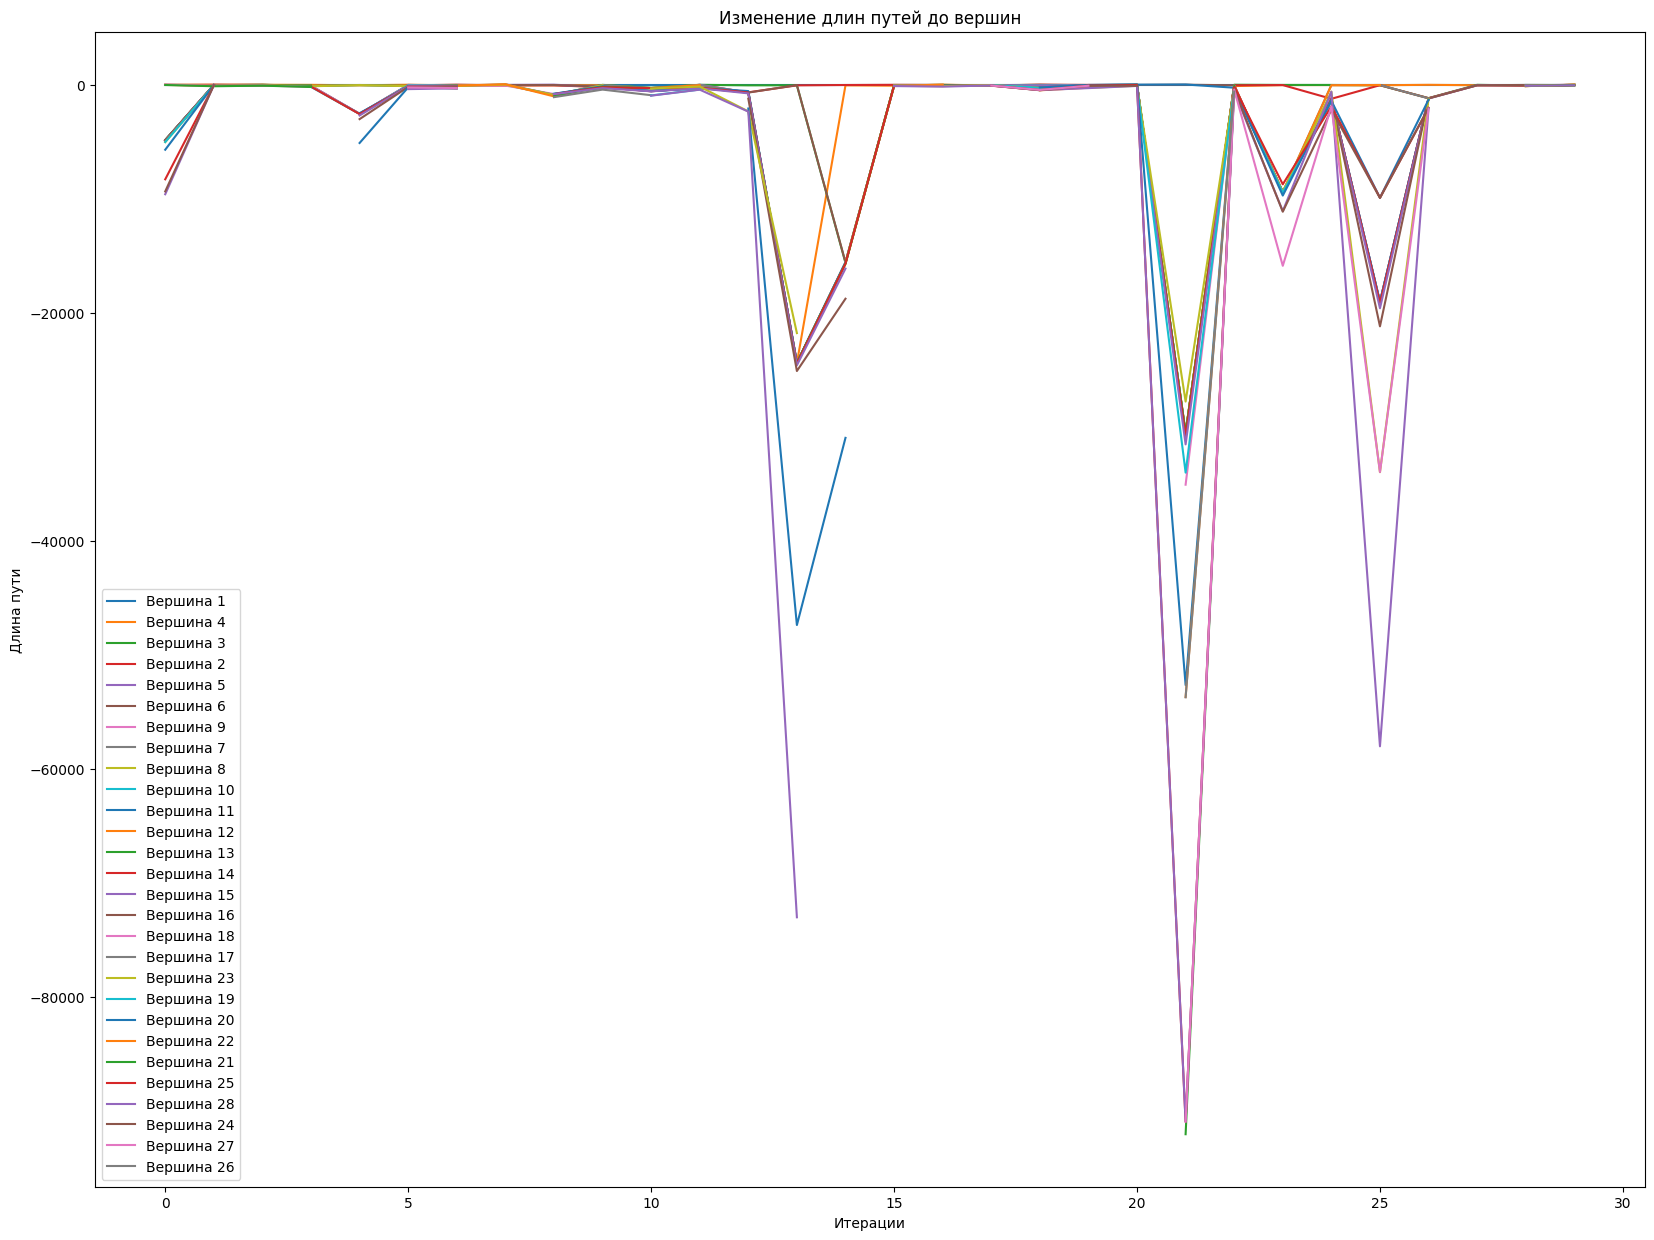

In [11]:
vertices = list(G.nodes())
lengths = dict(nx.floyd_warshall(G))
iterations = 30
path_lengths = {vertex: [] for vertex in vertices}
for _ in range(iterations):
    # Изменение весов всех рёбер
    for (u, v) in G.edges():
        G[u][v]['weight'] = np.random.randint(-30, 31)

    # меняем направление случайно
    for (u, v) in list(G.edges()):
        if u != 1 and v != 28 and np.random.rand() < 0.5:
            G.remove_edge(u, v)
            G.add_edge(v, u, weight=np.random.randint(-30, 31))
    lengths = dict(nx.floyd_warshall(G))
    for vertex in vertices:
        path_lengths[vertex].append(lengths[1][vertex])

plt.figure(figsize=(20, 15))
for vertex in vertices:
    plt.plot(range(iterations), path_lengths[vertex], label=f'Вершина {vertex}')
plt.title("Изменение длин путей до вершин")
plt.xlabel("Итерации")
plt.ylabel("Длина пути")
plt.legend()

In [12]:
lengths = dict(nx.floyd_warshall(G))
print("Кратчайшие пути между всеми вершинами и их длина:")
for start, targets in lengths.items():
    for target, length in targets.items():
        print(f"Путь от {start} до {target}: {length}")

Кратчайшие пути между всеми вершинами и их длина:
Путь от 1 до 1: 0
Путь от 1 до 4: -15
Путь от 1 до 3: -26
Путь от 1 до 2: 2
Путь от 1 до 5: 8
Путь от 1 до 6: -2
Путь от 1 до 9: 24
Путь от 1 до 7: -33
Путь от 1 до 8: inf
Путь от 1 до 10: 13
Путь от 1 до 11: -1
Путь от 1 до 12: 6
Путь от 1 до 13: 24
Путь от 1 до 14: 5
Путь от 1 до 15: 17
Путь от 1 до 16: inf
Путь от 1 до 18: 36
Путь от 1 до 17: 14
Путь от 1 до 23: 34
Путь от 1 до 19: inf
Путь от 1 до 20: inf
Путь от 1 до 22: 25
Путь от 1 до 21: -5
Путь от 1 до 25: inf
Путь от 1 до 28: -20
Путь от 1 до 24: inf
Путь от 1 до 27: inf
Путь от 1 до 26: -1
Путь от 4 до 4: 0
Путь от 4 до 7: 4
Путь от 4 до 1: inf
Путь от 4 до 3: inf
Путь от 4 до 2: inf
Путь от 4 до 5: inf
Путь от 4 до 6: inf
Путь от 4 до 9: inf
Путь от 4 до 8: inf
Путь от 4 до 10: inf
Путь от 4 до 11: inf
Путь от 4 до 12: inf
Путь от 4 до 13: inf
Путь от 4 до 14: inf
Путь от 4 до 15: inf
Путь от 4 до 16: inf
Путь от 4 до 18: inf
Путь от 4 до 17: inf
Путь от 4 до 23: inf
Путь от